# Project AI - Breast Cancer Classification using SVM from Scratch
### Pandega Abyan Zumarsyah - 18/424977/TK/46672

Pada project ini, saya melakukan klasifikasi tipe Breast Cancer menggunakan SVM (Support Vector Machine). SVM dipilih karena sangat terkenal dan performanya cukup bagus. Selain itu, saya pribadi juga ingin belajar lebih terkait SVM ini. Sementara itu, data terkait Breast Cancer didapatkan dari kaggle dengan nama Breast Cancer Wisconsin. 

Datanya memiliki dua kelas yaitu Benign/jinak dan Malignant/ganas. Terdapat 30 fitur, di antaranya radius_mean, texture_mean, radius_worst, dan radius_se. Namun, di awal, perlu pengolahan untuk memilih fitur apa saja yang akan digunakan. Pemilihan itu berdasarkan pada nilai cross-correlation setiap fitur dengan yang lain. Setelah itu, datanya dipisah antara training dan testing. 

Kemudian, masuk ke tahap training. Pada training ini, persamaan dasar dari SVM dioptimasi menggunakan metode Stochastic Gradient Descent (SGD). SGD memang banyak digunakan untuk optimasi SVM. Dalam training SVM dengan SGD ini, parameter seperti learning rate dan regularization perlu diatur agar hasilnya maksimal. 

Dalam pengerjaannya, saya awalnya mempelajari dataset yang ada beserta fitur-fiturnya. Itu penting untuk menentukan fitur yang tepat. Kemudian, saya mempelajari SVM mulai dari konsep, jenis, sampai implementasinya dengan optimasi berbasis SGD. Meski saya juga mempelajari kode yang ada di referensi, kode di sini tidak hanya copy-paste dari referensi. Dari berbagai kode yang ada, saya melakukan penyederhanaan dan improvement. Bagian kode yang saya kembangkan sendiri juga banyak. Referensi saya di antaranya:
- Terkait Dataset: https://www.kaggle.com/priyanka841/breast-cancer-wisconsin
- Konsep SVM dengan SGD: https://svivek.com/teaching/lectures/slides/svm/svm-sgd.pdf
- Konsep SVM dengan SGD: https://towardsdatascience.com/solving-svm-stochastic-gradient-descent-and-hinge-loss-8e8b4dd91f5b
- Konsep SVM dan kode: https://medium.com/deep-math-machine-learning-ai/chapter-3-support-vector-machine-with-math-47d6193c82be
- Konsep SVM dan kode: https://medium.com/@saishruthi.tn/support-vector-machine-using-numpy-846f83f4183d
- Konsep SVM Soft Margin: https://youtu.be/IjSfa7Q8ngs
- Konsep SVM (Stanford Lecture): https://youtu.be/8xbnLHn4jjQ

## Import Library and Data
Pada bagian ini, terdapat import library, import data, dan overview terkait data. Library yang digunakan hanyalah library dasar, bukan library lanjutan untuk machine learning. Data diimport dalam bentuk Dataframe yang kemudian dapat kita lihat overview nya. Terdapat 2 kelas, 30 fitur, dan 569 instances

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load csv data as Dataframe
original = pd.read_csv('breast cancer.csv')

In [3]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
original.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# count instances of each classes
original['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Feature Engineering
Kita perlu memilih fitur apa yang akan digunakan dan melakukan sedikit penyesuaian pada nilainya

### Cross-Correlation for Choosing Suitable Feature

Awalnya, terdapat perhitungan cross-correlation. Fitur-fitur dengan korelasi yang tinggi dipilih salah satu saja untuk mewakili yang lain. Dengan begitu, modelnya menjadi lebih sederhana dan komputasinya menjadi lebih ringan. Selain itu, fitur-fitur dengan korelasi tinggi jika digabungkan justru bisa mengurangi performa model. 

Selain korelasi antarfitur, kita juga perlu memperhatikan korelasi tiap fitur dengan variabel dependen yaitu diagnosis. Ketika korelasi suatu fitur dengan diagnosis sangat rendah, kita bisa membuangnya dan fokus pada fitur lain yang lebih penting. 

In [6]:
# copy original dataframe
data = original.copy()

# map 'B' => -1 and 'M' => 1
data = data.applymap(lambda x: -1 if (x == 'B') else 1 if (x == 'M') else x)

# drop columns that are not used in calculating cross-correlation
data = data.drop(['id', 'Unnamed: 32'], axis=1)

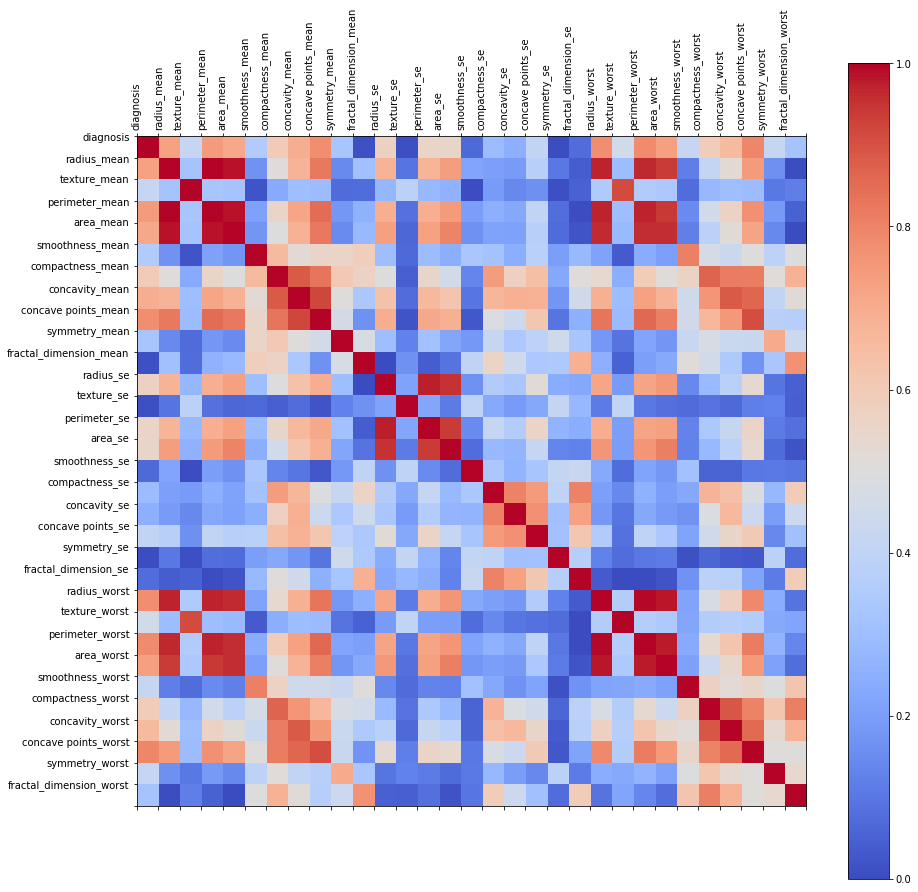

In [7]:
# calculate correlation
corr = abs(data.corr())

# create heat map of the correlation
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot()
cax = ax.matshow(corr, vmin = 0, vmax = 1, cmap = 'coolwarm')
fig.colorbar(cax)

# manage ticks of the plot
ticks = np.arange(-0.5, len(data.columns)+0.5, 1)
ax.set_xticks(ticks)
ax.set_xticklabels(data.columns)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_yticklabels(data.columns)

plt.show()

Dari heat map di atas, ada beberapa grup yang menunjukan cross-correlation yang tinggi (terlihat dari warna sangat merah), di antaranya:
- Hampir semua fitur mean dan worse
- Fitur radius, perimeter, area
- Fitur compactness, concavity, concave points

Di sisi lain, kita tidak bisa memilih fitur yang korelasinya dengan diagnosis terlalu rendah (terlihat dari warna sangat biru pada baris/kolom pertama). Dengan pertimbangan korelasi antarfitur dan korelasi fitur dengan diagnosis, saya memilih empat fitur untuk digunakan: radius_mean, texture_mean, concavity_mean, dan radius_se

In [8]:
# simplify the data into one column for class type and four columns for features
data = original[['diagnosis', 'radius_mean', 'texture_mean', 'concavity_mean', 'radius_se']]

# map 'B' => -1 and 'M' => 1
data = data.applymap(lambda x: -1 if (x == 'B') else 1 if (x == 'M') else x)

In [9]:
data.tail()

,diagnosis,radius_mean,texture_mean,concavity_mean,radius_se
564,1,21.56,22.39,0.24390,1.1760
565,1,20.13,28.25,0.14400,0.7655
566,1,16.60,28.08,0.09251,0.4564
567,1,20.60,29.33,0.35140,0.7260
568,-1,7.76,24.54,0.00000,0.3857


In [10]:
data.corr()

,diagnosis,radius_mean,texture_mean,concavity_mean,radius_se
diagnosis,1.000000,0.730029,0.415185,0.696360,0.567134
radius_mean,0.730029,1.000000,0.323782,0.676764,0.679090
texture_mean,0.415185,0.323782,1.000000,0.302418,0.275869
concavity_mean,0.696360,0.676764,0.302418,1.000000,0.631925
radius_se,0.567134,0.679090,0.275869,0.631925,1.000000


Dari korelasi di atas, terlihat bahwa korelasi antarfitur tidak ada yang terlalu tinggi (lebih dari 0.7) dan korelasi fitur dengan diagnosis tidak ada yang terlalu rendah (kurang dari 0.4). Meski sebenarnya, penentuan batas 0.7 dan 0.4 di sini belum memiliki dasar yang kuat

In [11]:
# check duplicates
data.duplicated().sum()

0

### Split the Data
Data yang berbentuk Dataframe dibagi menjadi array input dan array output. Selain itu, data juga dibagi menjadi data training dan data test secara random berdasarkan seed yang dapat diatur. Itu dilakukan melalui fungsi-fungsi pada numpy.random

In [12]:
# Dataframe => Array
Xy = data.to_numpy()

In [13]:
# shuffle array
np.random.seed(15)
np.random.shuffle(Xy)

# ratio of test data to all data
test_ratio = 0.3

# train-test split
split_idx = round(len(Xy)*test_ratio)
Xy_test = Xy[:split_idx]
Xy_train = Xy[split_idx:]

In [14]:
# input-output split
X_test = Xy_test[:,1:]
y_test = Xy_test[:,0]
X_train = Xy_train[:,1:]
y_train = Xy_train[:,0]

In [15]:
print('Train data contains', len(y_train), 'instances and Test data contains', len(y_test), 'instances')

Train data contains 398 instances and Test data contains 171 instances


## Support Vector Machine
Bagian ini memuat pendefinisian kelas terkait SVM, kemudian terdapat training dan testing. Namun, sebelumnya, terdapat sedikit penjelasan terkait konsep SVM yang akan diterapkan.

### Explanation

#### Cost Function
Bagian penting dari berbagai model machine learning adalah cost function atau loss function. Pada SVM, tujuan utamanya adalah membuat marginnya (jarak terdekat antara titik data dengan bidang pembatas) selebar mungkin. Di sisi lain, kita perlu menyadari bahwa sebagian besar data di dunia nyata tidak linearly separable, tidak dapat dipisahkan dengan bidang pembatas linear. Maka, perlu ada semacam penalty untuk setiap titik data yang melampaui marginnya, makin jauh maka penalty nya makin besar. Dengan begitu, selain memaksimalkan margin, kita juga perlu meminimalkan total penalty nya. Fungsi yang perlu diminimalkan untuk keperluan itu:

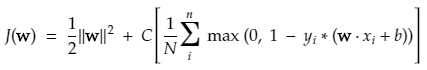
Di sini, w adalah bobot/weight, C adalah parameter regularization, N atau n adalah banyak data, xi dan yi terkait dengan instance input dan output, kemudian b terkait dengan bias/intercept. Suku pertama terkait dengan memaksimalkan margin, jika kuadrat dari weight nya minimum maka margin nya maksimum. Sementara itu, suku kedua yang merupakan hinge loss terkait dengan penalty. 

C merupakan parameter terpenting di sini. Dengan C, kita bisa menentukan apa yang akan kita optimalkan, lebar margin atau total penalty. Jika C besar, model akan lebih berusaha meminimalkan penalty daripada memaksimalkan margin, berlaku pula sebaliknya. Kemudian, pada praktiknya, variabel b di atas akan dimasukan sebagai salah satu komponen w. Konsekuensinya, data input nya perlu sedikit disesuaikan dengan ditambah elemen bernilai satu. 

#### Gradient of the Cost Function
Karena kita menggunakan SGD, maka kita perlu mencari gradien dari cost function. Persamaan cost function diturunkan secara parsial terhadap w sehingga menghasilkan:
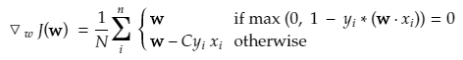
Pada SGD, kita hanya menghitung instance dari gradien nya, tidak untuk seluruh data. Maka, perhitungannya menjadi lebih sederhana tanpa melibatkan summation. Kita bisa menghilangkan 1/N dan operasi sigmanya

#### Stochastic Gradient Descent
Konsep dari SGD adalah menggunakan minus dari gradien untuk menuruni kurva menuju titik minimum. Konsep ini dapat diformulasikan:

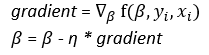
Di sini, beta adalah semacam weight, f adalah cost function, dan eta adalah learning rate. Operasi ini dilakukan untuk setiap instance pada data yang ada. Ketika kita telah melakukannya untuk seluruh instance, kita mendapatkan satu epoch. Karena kita telah mendefinisikan gradien pada bagian sebelumnya, maka itu bisa langsung diterapkan di sini

#### Evaluation
Evaluasi yang dimaksud adalah menggunakan model untuk memprediksi output berdasarkan data input. Itu dapat dilakukan dengan mengalikan data input dengan weight. Hasilnya adalah semacam vektor jarak, dari bidang pembatas ke tiap titik data. Jika nilainya positif, dia masuk salah satu kelas sehingga nilainya diubah menjadi 1. Jika nilainya negatif, dia masuk kelas yang lain sehingga nilainya diubah menjadi -1

Bagian ini juga terkait dengan perhitungan loss dan accuracy. Untuk perhitungan loss, persamaannya sudah dijelaskan sebelumnya. Untuk accuracy, konsepnya adalah rasio antara banyaknya prediksi yang benar dengan banyak data total. Banyaknya prediksi benar dapat dicari dengan mengalikan vektor hasil prediksi (yang nilainya antara -1 dan 1) dengan vektor output sebenarnya (yang nilainya juga antara -1 dan 1), lalu dihitung banyaknya nilai 1

### SVM Class
Kelas ini meliputi berbagai variabel dan fungsi yang berkaitan dengan model SVM

In [16]:
class SupportVectorMachine:
    
    def __init__(self, regularization, weight = 0):
        self.C = regularization
        self.w = weight
    
    def calc_loss(self, data_input, output):
        # calculate hinge loss
        dist = 1 - output * (np.dot(data_input, self.w))
        dist = np.maximum(dist, 0)
        hinge_loss = self.C * (np.sum(dist) / len(output))
        # combine hinge loss and margin cost
        loss = np.dot(self.w, self.w)/2 + hinge_loss
        return loss
    
    def calc_accuracy(self, data_input, output):
        predict = np.sign(np.dot(data_input, self.w))
        acc = (predict*output == 1).sum()/len(output)
        return acc
    
    def fit(self, X_train, y_train, learning_rate, epoch):
        # Initialize
        self.X_train = np.c_[X_train, np.ones(X_train.shape[0])]
        self.y_train = y_train
        self.l_rate = learning_rate
        self.epoch = epoch
        self.w = np.zeros(self.X_train.shape[1])
        self.losses = []
        self.accs = []
        # Training
        for e in range(self.epoch+1):  
            for i, x in enumerate(self.X_train):
                # calculate gradient
                if ((1 - y_train[i]*np.dot(x, self.w)) < 0):
                    gradient = self.w
                else:
                    gradient = self.w - self.C*y_train[i]*x
                # update weight
                self.w = self.w - self.l_rate*gradient
            # calculate loss and accuracy
            loss = self.calc_loss(self.X_train, y_train)
            acc = self.calc_accuracy(self.X_train, y_train)
            # save and print them each 500 epochs
            if ((e % 500) == 0):
                self.losses.append(loss)
                self.accs.append(acc)
                print('Epoch ', e, ' | loss = ', loss, ' | accuracy = ', acc)
        
    def plot_history(self):
        epochs = np.arange(0, self.epoch+500, 500) # each 500 epochs as x-axis point
        fig, axs = plt.subplots(2, figsize=(12, 8))
        axs[0].plot(epochs, self.losses)             # first plot is about loss
        axs[1].plot(epochs, self.accs, 'tab:orange') # second plot is about accuracy
        axs[0].set(ylabel = 'Loss', xlabel = 'epochs')
        axs[1].set(ylabel = 'Accuracy', xlabel = 'epochs')
        print('History of Loss and Accuracy')
        
    def predict(self, X_test, y_test):
        # add ones in the last column as biases
        X_test = np.c_[X_test, np.ones(X_test.shape[0])]
        # print loss and accuracy
        loss = self.calc_loss(X_test, y_test)
        acc = self.calc_accuracy(X_test, y_test)
        print('loss = ', loss, ' | accuracy = ', acc)
        # return output prediction
        y_predict = np.sign(np.dot(X_test, self.w))
        return y_predict, loss, acc

### Batch Training Trial
Ini dijalankan hanya saat diperlukan saja, utamanya ketika mencari nilai optimal untuk berbagai parameter seperti regularization dan learning rate

In [17]:
regularization = [5000, 10000, 50000]
learning_rate = [0.0000001, 0.00000001, 0.000000001]
epochs = 5000

In [18]:
%%capture
# to surpress output in this cell

# create Dictionary to save results
results = {}

for C in regularization:
    SVM = SupportVectorMachine(C) # create an object
    for lr in learning_rate:
        key = 'C='+str(C)+'   lr='+str(lr) # will be row names
        SVM.fit(X_train, y_train, lr, epochs)
        loss1 = SVM.losses[-1] # get the final loss
        acc1 = SVM.accs[-1]    # get the final accuracy
        _, loss2, acc2 = SVM.predict(X_test, y_test)
        results[key] = [loss1, acc1, loss2, acc2] # will be row values

# create Dataframe from Dictionary
column_name = ['Train - Loss', 'Train - Acc', 'Test - Loss', 'Test - Acc']
results_DF = pd.DataFrame.from_dict(results, orient='index', columns=column_name)

In [19]:
results_DF

,Train - Loss,Train - Acc,Test - Loss,Test - Acc
C=5000 lr=1e-07,946.620446,0.929648,1367.187378,0.883041
C=5000 lr=1e-08,1225.564113,0.902010,1693.133296,0.865497
C=5000 lr=1e-09,2965.475262,0.781407,3136.113722,0.771930
C=10000 lr=1e-07,1928.886788,0.924623,2831.254601,0.883041
C=10000 lr=1e-08,2084.013297,0.927136,3021.563772,0.888889
C=10000 lr=1e-09,4358.052673,0.841709,4884.047051,0.824561
C=50000 lr=1e-07,14127.216124,0.912060,18334.007670,0.900585
C=50000 lr=1e-08,8519.565232,0.927136,12645.141482,0.877193
C=50000 lr=1e-09,12031.202918,0.907035,16727.845568,0.865497


Perlu diperhatikan bahwa nilai loss dipengaruhi secara langsung oleh nilai regularization C. Makin besar C, umumnya loss akan menjadi makin besar. Karenanya, untuk nilai C yang berbeda, nilai loss tidak bisa dibandingkan

### Training the Model
Terkait training ini, kita perlu menyesuaikan beberapa parameter agar proses training dan model yang dihasilkan bisa optimal: regularization, learning rate, dan epochs.

In [20]:
regularization = 10000
learning_rate = 0.0000001
epochs = 12000

In [21]:
SVM = SupportVectorMachine(regularization) # create an object/model
SVM.fit(X_train, y_train, learning_rate, epochs) # train the SVM model

Epoch  0  | loss =  8557.252264504092  | accuracy =  0.5904522613065326
Epoch  500  | loss =  2062.439524148559  | accuracy =  0.9271356783919598
Epoch  1000  | loss =  1958.788873399038  | accuracy =  0.9271356783919598
Epoch  1500  | loss =  1942.2989361684656  | accuracy =  0.9246231155778895
Epoch  2000  | loss =  2002.3133692243366  | accuracy =  0.9221105527638191
Epoch  2500  | loss =  1968.6277145164574  | accuracy =  0.9246231155778895
Epoch  3000  | loss =  1825.7301417464903  | accuracy =  0.9321608040201005
Epoch  3500  | loss =  1869.5917531899859  | accuracy =  0.9296482412060302
Epoch  4000  | loss =  1930.120867310527  | accuracy =  0.9246231155778895
Epoch  4500  | loss =  1887.4582664857355  | accuracy =  0.9271356783919598
Epoch  5000  | loss =  1928.8867877132402  | accuracy =  0.9246231155778895
Epoch  5500  | loss =  1779.9215483035005  | accuracy =  0.9396984924623115
Epoch  6000  | loss =  1779.9201110080787  | accuracy =  0.9422110552763819
Epoch  6500  | loss 

History of Loss and Accuracy


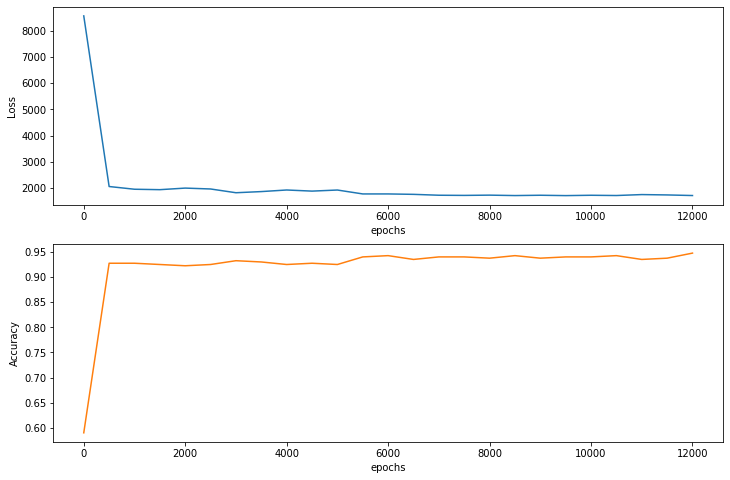

In [22]:
# plot the history of loss and accuracy values
SVM.plot_history()

In [23]:
# model weights
print(SVM.w)

[  0.5892066    0.14006831  12.42767612   2.34723759 -13.25413646]


### Evaluate the Model
Pada bagian ini, model SVM yang telah dilatih kemudian diuji dengan data test yang belum pernah ia lihat sebelumnya. Selain itu, ada pula semacam confusion matrix untuk melihat output dari model dengan lebih jelas

In [24]:
def confusion_matrix(y_true, y_predict, classes):
    # initialize matrix as dictionary
    matrix = {}
    # looping to fill 'row'
    for key1, val1 in classes.items():
        bool1 = (y_true == key1)
        count1 = bool1.sum()
        index = 'True '+classes[key1] # will be row names
        matrix[index] = [] # will be row values
        # looping to fill 'column' in single 'row'
        for key2, val2 in classes.items():
            bool2 = (y_predict == key2)
            count2 = (bool1*bool2).sum()
            percent = 100*count2/count1
            text = str(count2) + ' (' + "{:.2f}".format(percent) + '%)'
            matrix[index].append(text)
    # create dataframe from dictionary
    column_name = ['Predicted '+classes[key] for key in classes.keys()]
    DF = pd.DataFrame.from_dict(matrix, orient='index', columns=column_name)
    return DF

In [25]:
print('model performance for train dataset:')
y_predict1, loss1, acc1 = SVM.predict(X_train, y_train)

model performance for train dataset:
loss =  1719.4364107244965  | accuracy =  0.9472361809045227


In [26]:
print('confusion matrix for train dataset:')
matrix1 = confusion_matrix(y_train, y_predict1, {-1:'Benign', 1:'Malignant'})
matrix1

confusion matrix for train dataset:


,Predicted Benign,Predicted Malignant
True Benign,241 (96.79%),8 (3.21%)
True Malignant,13 (8.72%),136 (91.28%)


In [27]:
print('model performance for test dataset:')
y_predict2, loss2, acc2 = SVM.predict(X_test, y_test)

model performance for test dataset:
loss =  2394.1731244801813  | accuracy =  0.9005847953216374


In [28]:
print('confusion matrix for train dataset:')
matrix2 = confusion_matrix(y_test, y_predict2, {-1:'Benign', 1:'Malignant'})
matrix2

confusion matrix for train dataset:


,Predicted Benign,Predicted Malignant
True Benign,100 (92.59%),8 (7.41%)
True Malignant,9 (14.29%),54 (85.71%)


## Analysis

### Method
Secara teori, implementasi metode SVM berbasis SGD di sini sudah cukup sesuai dengan teori. Meski memang, terdapat banyak hal yang bisa ditingkatkan. Apalagi mengingat metode SVM itu sendiri sebenarnya sangat beragam dalam pendekatan implementasinya. 

Dari berbagai percobaan yang saya lakukan dengan berbagai nilai parameter, saya merasa bahwa metode optimasinya masih perlu ditingkatkan. Di awal, memang bekerja dengan sangat baik. Namun, tidak lama setelah itu, terjadi semacam stuck sehingga loss nya tidak bisa berkurang lagi. Berkaitan dengan hal itu, ketika sudah dekat dengan titik minimum, loss nya hanya bisa berosilasi naik-turun, tanpa bisa menuju ke titik minimum itu. Ke depannya, masalah ini di antaranya bisa diatasi dengan learning rate yang makin kecil saat epoch nya sudah cukup besar. 

Kemudian, penggunaan Batch Training untuk mencari parameter yang sesuai, saya rasa cukup berguna. Meski memang, saya sendiri belum menggunakannya secara maksimal untuk mencari parameter terbaik. Itu baru digunakan untuk mendapat gambaran umum terkait pengaruh nilai regularization dan learning rate. 

### Result
Secara umum, kode SVM yang dibuat telah mampu melakukan klasifikasi dengan cukup baik pada data Breast Cancer. Akurasi untuk data train mencapai 95% sementara untuk data test adalah 90%. Nilai itu didapatkan dengan model SVM yang nilai regularization nya diatur sebesar 10000, learning rate nya adalah 0.0000001, sementara epoch nya mencapai 12000. Meski nilai parameternya terlihat sangat besar (atau sangat kecil), waktu untuk training nya tidak terlalu lama, kurang dari 50 detik. 

Dari bagian Evaluation, kita melihat bahwa performa model pada data testing tidak berbeda jauh dengan performanya pada data training. Ini berarti, training telah terhindar dari overfitting dan bisa tergeneralisasi dengan cukup baik. Dari confusion matrix, terlihat bahwa kesalahan untuk tipe Malignant relatif lebih besar. Itu karena pada datanya terdapat ketidakseimbangan, tipe Benign lebih banyak daripada Malignant.